# Run the wavelength and the fringe frame maker notebooks first!

In [1]:
import os
os.environ['OPENTSDB_PYTHON_METRICS_TEST_MODE'] = 'True'

In [14]:
import importlib.resources
import requests
from banzai_floyds import settings
from banzai.utils.stage_utils import run_pipeline_stages
from banzai.utils.fits_utils import download_from_s3
import numpy as np
from astropy.io import ascii, fits
from astropy.coordinates import SkyCoord
from astropy import units
from matplotlib import pyplot
from glob import glob
import tarfile

In [3]:
os.environ['DB_ADDRESS'] = 'sqlite:///test_data/test.db'
settings.processed_path= os.path.join(os.getcwd(), 'test_data')
settings.fpack=True
settings.db_address = os.environ['DB_ADDRESS']
settings.RAW_DATA_FRAME_URL = f'https://archive-api.lco.global/frames'

In [4]:
# set up the context object.
import banzai.main
context = banzai.main.parse_args(settings, parse_system_args=False)

In [5]:
from banzai_floyds import dbs

In [6]:
dbs.ingest_standards(settings.db_address)

In [7]:
# Start with just the profile.
context = banzai.main.parse_args(settings, parse_system_args=False)

2024-02-07 14:06:04.242     INFO:      fits_utils: Downloading file coj2m002-en12-20200813-0026-e00.fits.fz from archive. ID: 33852323. | {"filename": "coj2m002-en12-20200813-0026-e00.fits.fz", "attempt_number": 1, "processName": "MainProcess"}
2024-02-07 14:06:06.729     INFO:          stages: Running banzai.stages.OverscanSubtractor | {"filename": "coj2m002-en12-20200813-0026-e00.fits.fz", "site": "coj", "instrument": "floyds02", "epoch": "20200813", "request_num": "2207853", "obstype": "SPECTRUM", "filter": "air", "processName": "MainProcess"}
2024-02-07 14:06:06.731     INFO:          stages: Running banzai.stages.Trimmer | {"filename": "coj2m002-en12-20200813-0026-e00.fits.fz", "site": "coj", "instrument": "floyds02", "epoch": "20200813", "request_num": "2207853", "obstype": "SPECTRUM", "filter": "air", "processName": "MainProcess"}
2024-02-07 14:06:06.731     INFO:            trim: Trimming image | {"filename": "coj2m002-en12-20200813-0026-e00.fits.fz", "site": "coj", "instrument

> /Users/cmccully/Dropbox/Mac (3)/Documents/workspace/banzai-floyds/banzai_floyds/flux.py(28)do_stage()
     27         import ipdb; ipdb.set_trace()
---> 28         for order_id in [1, 2]:
     29             in_order = image.extracted['order'] == order_id



ipdb>  n


> /Users/cmccully/Dropbox/Mac (3)/Documents/workspace/banzai-floyds/banzai_floyds/flux.py(29)do_stage()
     28         for order_id in [1, 2]:
---> 29             in_order = image.extracted['order'] == order_id
     30             data_to_fit = image.extracted[in_order]



ipdb>  n


> /Users/cmccully/Dropbox/Mac (3)/Documents/workspace/banzai-floyds/banzai_floyds/flux.py(30)do_stage()
     29             in_order = image.extracted['order'] == order_id
---> 30             data_to_fit = image.extracted[in_order]
     31             # TODO: check this value to make sure we are past the dip in the senstivity function



ipdb>  n


> /Users/cmccully/Dropbox/Mac (3)/Documents/workspace/banzai-floyds/banzai_floyds/flux.py(32)do_stage()
     31             # TODO: check this value to make sure we are past the dip in the senstivity function
---> 32             wavelengths_to_fit = data_to_fit['wavelength'] > 4600.0
     33             for telluric_region in telluric_utils.TELLURIC_REGIONS:



ipdb>  n


> /Users/cmccully/Dropbox/Mac (3)/Documents/workspace/banzai-floyds/banzai_floyds/flux.py(33)do_stage()
     32             wavelengths_to_fit = data_to_fit['wavelength'] > 4600.0
---> 33             for telluric_region in telluric_utils.TELLURIC_REGIONS:
     34                 in_region = np.logical_and(data_to_fit['wavelength'] >= telluric_region['wavelength_min'],



ipdb>  n


> /Users/cmccully/Dropbox/Mac (3)/Documents/workspace/banzai-floyds/banzai_floyds/flux.py(34)do_stage()
     33             for telluric_region in telluric_utils.TELLURIC_REGIONS:
---> 34                 in_region = np.logical_and(data_to_fit['wavelength'] >= telluric_region['wavelength_min'],
     35                                            data_to_fit['wavelength'] <= telluric_region['wavelength_max'])



ipdb>  pyplot.plot(wavelengths_to_fit, data_to_fit)


*** NameError: name 'pyplot' is not defined


ipdb>  from matplotlib import pyplot
ipdb>  pyplot.plot(wavelengths_to_fit, data_to_fit)


*** TypeError: Cannot cast array data from dtype([('fluxraw', '<f8'), ('fluxrawerr', '<f8'), ('wavelength', '<f8'), ('binwidth', '<f8'), ('order', '<i8')]) to dtype('float64') according to the rule 'unsafe'


ipdb>  n


> /Users/cmccully/Dropbox/Mac (3)/Documents/workspace/banzai-floyds/banzai_floyds/flux.py(35)do_stage()
     34                 in_region = np.logical_and(data_to_fit['wavelength'] >= telluric_region['wavelength_min'],
---> 35                                            data_to_fit['wavelength'] <= telluric_region['wavelength_max'])
     36                 wavelengths_to_fit = np.logical_and(wavelengths_to_fit, np.logical_not(in_region))



ipdb>  n


> /Users/cmccully/Dropbox/Mac (3)/Documents/workspace/banzai-floyds/banzai_floyds/flux.py(34)do_stage()
     33             for telluric_region in telluric_utils.TELLURIC_REGIONS:
---> 34                 in_region = np.logical_and(data_to_fit['wavelength'] >= telluric_region['wavelength_min'],
     35                                            data_to_fit['wavelength'] <= telluric_region['wavelength_max'])



ipdb>  n


> /Users/cmccully/Dropbox/Mac (3)/Documents/workspace/banzai-floyds/banzai_floyds/flux.py(36)do_stage()
     35                                            data_to_fit['wavelength'] <= telluric_region['wavelength_max'])
---> 36                 wavelengths_to_fit = np.logical_and(wavelengths_to_fit, np.logical_not(in_region))
     37 



ipdb>  until


> /Users/cmccully/Dropbox/Mac (3)/Documents/workspace/banzai-floyds/banzai_floyds/flux.py(38)do_stage()
     37 
---> 38             expected_flux = np.interp(data_to_fit[wavelengths_to_fit]['wavelength'],
     39                                       flux_standard['wavelength'],



ipdb>  n


> /Users/cmccully/Dropbox/Mac (3)/Documents/workspace/banzai-floyds/banzai_floyds/flux.py(39)do_stage()
     38             expected_flux = np.interp(data_to_fit[wavelengths_to_fit]['wavelength'],
---> 39                                       flux_standard['wavelength'],
     40                                       flux_standard['flux'])



ipdb>  n


> /Users/cmccully/Dropbox/Mac (3)/Documents/workspace/banzai-floyds/banzai_floyds/flux.py(40)do_stage()
     39                                       flux_standard['wavelength'],
---> 40                                       flux_standard['flux'])
     41             # Fit a low order polynomial to the data between the telluric regions in the red



ipdb>  n


> /Users/cmccully/Dropbox/Mac (3)/Documents/workspace/banzai-floyds/banzai_floyds/flux.py(38)do_stage()
     37 
---> 38             expected_flux = np.interp(data_to_fit[wavelengths_to_fit]['wavelength'],
     39                                       flux_standard['wavelength'],



ipdb>  n


> /Users/cmccully/Dropbox/Mac (3)/Documents/workspace/banzai-floyds/banzai_floyds/flux.py(42)do_stage()
     41             # Fit a low order polynomial to the data between the telluric regions in the red
---> 42             sensitivity_polynomial = Legendre.fit(data_to_fit[wavelengths_to_fit]['wavelength'],
     43                                                   expected_flux / data_to_fit[wavelengths_to_fit]['fluxraw'],



ipdb>  pyplot.plot(data_to_fit[wavelengths_to_fit]['wavelength'], expected_flux)


ipdb>  pyplot.show()


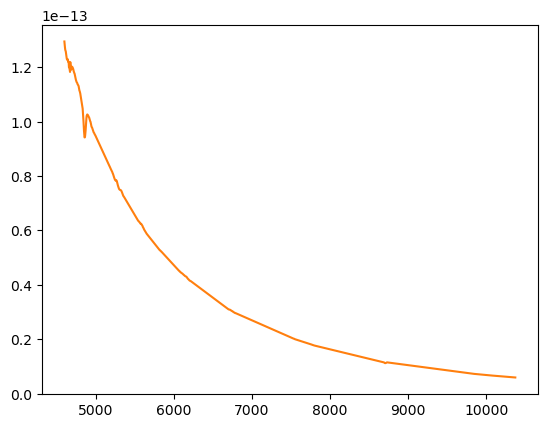

ipdb>  pyplot.plot(data_to_fit[wavelengths_to_fit]['wavelength'], data_to_fit[wavelengths_to_fit]['fluxraw'])


ipdb>  pyplot.show()


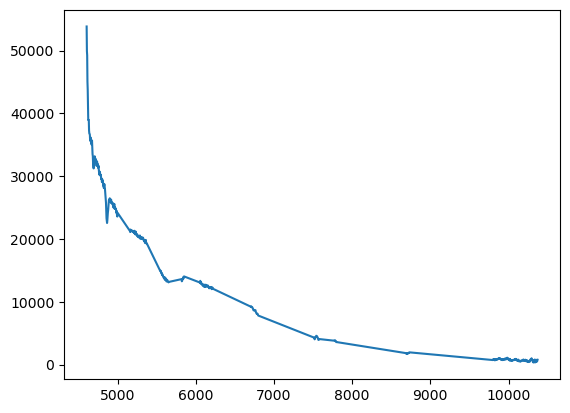

ipdb>  pyplot.plot(data_to_fit[wavelengths_to_fit]['wavelength'],expected_flux / data_to_fit[wavelengths_to_fit]['fluxraw'])


ipdb>  pyplot.show()


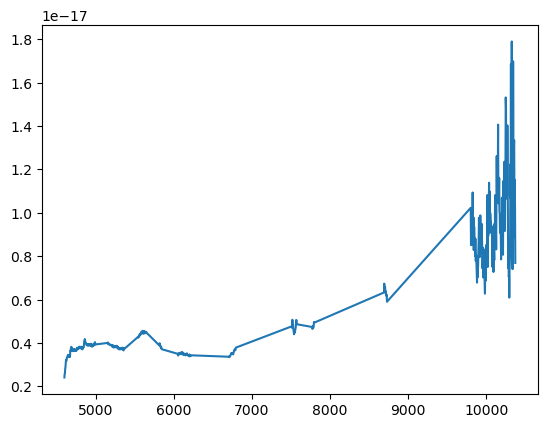

ipdb>   pyplot.plot(data_to_fit[wavelengths_to_fit]['wavelength'],expected_flux / data_to_fit[wavelengths_to_fit]['fluxraw'])


ipdb>  n


> /Users/cmccully/Dropbox/Mac (3)/Documents/workspace/banzai-floyds/banzai_floyds/flux.py(43)do_stage()
     42             sensitivity_polynomial = Legendre.fit(data_to_fit[wavelengths_to_fit]['wavelength'],
---> 43                                                   expected_flux / data_to_fit[wavelengths_to_fit]['fluxraw'],
     44                                                   self.SENSITIVITY_POLY_DEGREE[order_id],



ipdb>  n


> /Users/cmccully/Dropbox/Mac (3)/Documents/workspace/banzai-floyds/banzai_floyds/flux.py(44)do_stage()
     43                                                   expected_flux / data_to_fit[wavelengths_to_fit]['fluxraw'],
---> 44                                                   self.SENSITIVITY_POLY_DEGREE[order_id],
     45                                                   self.WAVELENGTH_DOMAIN,



ipdb>  n


> /Users/cmccully/Dropbox/Mac (3)/Documents/workspace/banzai-floyds/banzai_floyds/flux.py(45)do_stage()
     44                                                   self.SENSITIVITY_POLY_DEGREE[order_id],
---> 45                                                   self.WAVELENGTH_DOMAIN,
     46                                                   w=data_to_fit[wavelengths_to_fit]['fluxrawerr'] ** -2.0)



ipdb>  n


> /Users/cmccully/Dropbox/Mac (3)/Documents/workspace/banzai-floyds/banzai_floyds/flux.py(46)do_stage()
     45                                                   self.WAVELENGTH_DOMAIN,
---> 46                                                   w=data_to_fit[wavelengths_to_fit]['fluxrawerr'] ** -2.0)
     47 



ipdb>  n


> /Users/cmccully/Dropbox/Mac (3)/Documents/workspace/banzai-floyds/banzai_floyds/flux.py(42)do_stage()
     41             # Fit a low order polynomial to the data between the telluric regions in the red
---> 42             sensitivity_polynomial = Legendre.fit(data_to_fit[wavelengths_to_fit]['wavelength'],
     43                                                   expected_flux / data_to_fit[wavelengths_to_fit]['fluxraw'],



ipdb>  n


> /Users/cmccully/Dropbox/Mac (3)/Documents/workspace/banzai-floyds/banzai_floyds/flux.py(49)do_stage()
     48             # Divide the data by the flux standard in the blue
---> 49             polynomial_wavelengths = data_to_fit[data_to_fit['wavelength'] > 5000]['wavelength']
     50             this_sensitivity = np.zeros_like(data_to_fit['wavelength'].data)



ipdb>  n


> /Users/cmccully/Dropbox/Mac (3)/Documents/workspace/banzai-floyds/banzai_floyds/flux.py(50)do_stage()
     49             polynomial_wavelengths = data_to_fit[data_to_fit['wavelength'] > 5000]['wavelength']
---> 50             this_sensitivity = np.zeros_like(data_to_fit['wavelength'].data)
     51             this_sensitivity[data_to_fit['wavelength'] > 5000] = sensitivity_polynomial(polynomial_wavelengths)



ipdb>  n


> /Users/cmccully/Dropbox/Mac (3)/Documents/workspace/banzai-floyds/banzai_floyds/flux.py(51)do_stage()
     50             this_sensitivity = np.zeros_like(data_to_fit['wavelength'].data)
---> 51             this_sensitivity[data_to_fit['wavelength'] > 5000] = sensitivity_polynomial(polynomial_wavelengths)
     52             blue_wavelengths = data_to_fit['wavelength'] <= 5000



ipdb>  n


> /Users/cmccully/Dropbox/Mac (3)/Documents/workspace/banzai-floyds/banzai_floyds/flux.py(52)do_stage()
     51             this_sensitivity[data_to_fit['wavelength'] > 5000] = sensitivity_polynomial(polynomial_wavelengths)
---> 52             blue_wavelengths = data_to_fit['wavelength'] <= 5000
     53             # SavGol filter the ratio in the blue



ipdb>  pyplot.plot(polynomial_wavelengths, this_sensitivity[data_to_fit['wavelength'] > 5000])


ipdb>  pyplot.show()


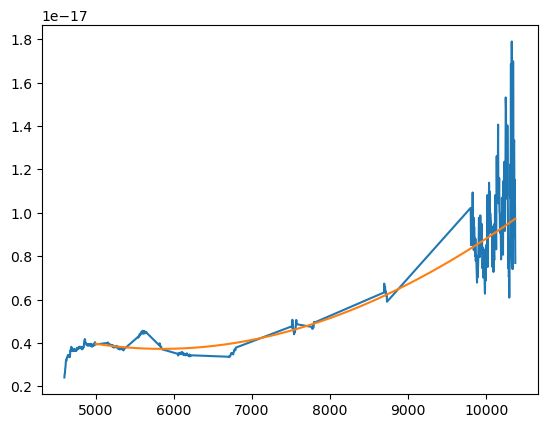

In [ ]:
from banzai_floyds.tests.test_e2e import is_standard
test_data = ascii.read(os.path.join(importlib.resources.files('banzai_floyds.tests'), 'data/test_data.dat'))
for row in test_data:
    if 'e00.fits' in row['filename'] and is_standard(row['object']):
        run_pipeline_stages([{'filename': row['filename'], 'RLEVEL': 0, 'frameid': row['frameid']}], context)

In [11]:
def fits_header_to_wavelength(header):
    crval = float(header['CRVAL1'])
    crpix = float(header['CRPIX1'])
    # Convert crpix to be zero indexed
    crpix -= 1
    if 'CDELT1' in header.keys():
        cdelt = float(header['CDELT1'])
    else:
        cdelt = float(header['CD1_1'])
    npix = float(header['NAXIS1'])
    lam = np.arange(crval - cdelt * crpix ,
                    crval + cdelt * (npix - crpix) - 1e-4,
                    cdelt)
    return lam

coj2m002-en12-20200813-0026-e91-1d.fits.fz


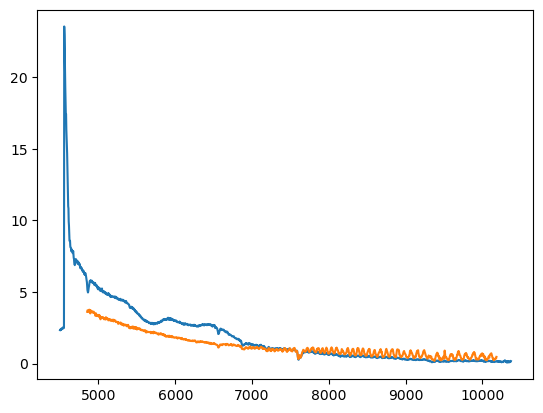

coj2m002-en12-20200813-0026-e91-1d.fits.fz


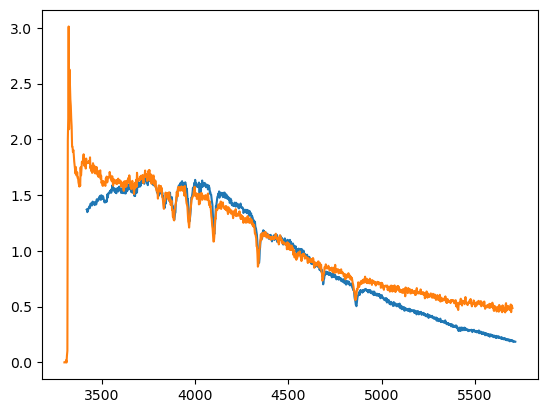

ogg2m001-en06-20200822-0007-e91-1d.fits.fz


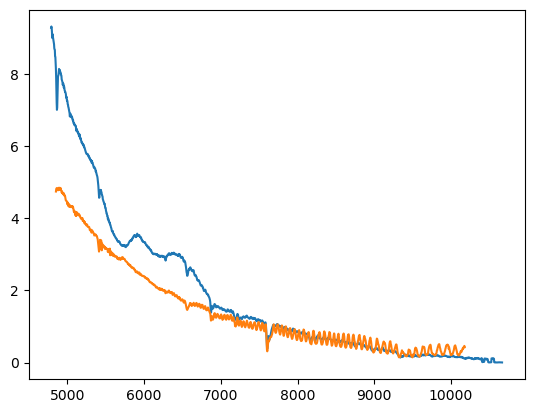

ogg2m001-en06-20200822-0007-e91-1d.fits.fz


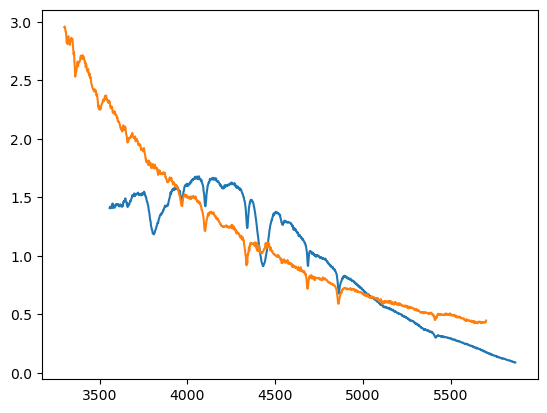

In [22]:
orders_to_color = {1: 'red', 2: 'blue'}

                   # Untar and extract the arc file deleting the rest
for filename in glob('test_data/*.tar.gz'):
    with tarfile.open(filename, 'r:gz') as f:
        for file_to_extract in f.getnames():
            if 'ttarc' == file_to_extract[:5]:
                f.extract(file_to_extract, os.path.join(os.getcwd(), 'test_data'))

tar_filenames = glob('test_data/*.tar.gz')

# plot the raw flux against the old pipeline's extractions
for row in test_data:
    if 'e00.fits' in row['filename'] and is_standard(row['object']):
        spectrum = glob(f'./test_data/*/*/*/processed/{row["filename"].replace("e00", "e91").replace(".fits", "-1d.fits")}')[0]
        hdu = fits.open(spectrum)
        site = row['filename'][:3]
        for tar_filename in tar_filenames:
            if os.path.basename(tar_filename)[:3].lower() == site:
                with tarfile.open(tar_filename, 'r:gz') as f:
                    for file_to_extract in f.getnames():
                        if 'ex.fits' in file_to_extract:
                            f.extract(file_to_extract, os.path.join(os.getcwd(), 'test_data'))
        for i in range(1, 3):
            in_order = hdu['SPECTRUM'].data['order'] == i
            data = hdu['SPECTRUM'].data
            data_to_plot = data['fluxraw'][in_order]
            data_to_plot /= np.median(data_to_plot)
            pyplot.plot(data['wavelength'][in_order], data_to_plot)

            hdu[0].header['OBJECT'].upper()
            print(os.path.basename(spectrum))

            # get the old pipeline equivalent
            old_extraction = glob(f'test_data/tt{hdu[0].header["OBJECT"].upper()}*{orders_to_color[i]}*_ex.fits*')[0]
            old_hdu = fits.open(old_extraction)
            iraf_wavelengths = fits_header_to_wavelength(old_hdu[0].header)
            iraf_data_plot = old_hdu[0].data[0, :].T
            iraf_data_plot /= np.median(iraf_data_plot)
            pyplot.plot(iraf_wavelengths, iraf_data_plot)
            pyplot.show()

In [19]:
tar_filenames

['test_data/OGG_calib_2217414_ftn_20200823_59085.tar.gz',
 'test_data/LCO2020B-003_2217762_ftn_20200823_59085.tar.gz',
 'test_data/COJ_calib_2207853_fts_20200813_59075.tar.gz',
 'test_data/KEY2020B-002_2207712_fts_20200813_59075.tar.gz']

In [ ]:
test_data = ascii.read(os.path.join(importlib.resources.files('banzai_floyds.tests'), 'data/test_data.dat'))
for row in test_data:
    if 'e00.fits' in row['filename'] and not is_standard(row['object']):
        run_pipeline_stages([{'filename': row['filename'], 'RLEVEL': 0, 'frameid': row['frameid']}], context)

In [ ]:
from glob import glob
from astropy.io import fits

In [ ]:
extracted_spectra = glob('./test_data/*/*/*/processed/*-1d.fits.fz')

In [ ]:
#for f in extracted_spectra:
f = extracted_spectra[1]
hdu = fits.open(f)
pyplot.plot(hdu[1].data['wavelength'], hdu[1].data['flux'])
pyplot.yscale('log')
pyplot.show()